<a href="https://colab.research.google.com/github/finahusnaa/Proyek-SDA-Sistem-Klasikasi-PGK/blob/main/1stWeekTasks/UAS_SDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sistem Klasifikasi Penyakit Gagal Ginjal Kronik
**Implementasi Struktur Data Tree**  


In [ ]:
!pip install graphviz openpyxl

import pandas as pd
from graphviz import Digraph
from IPython.display import display
import ipywidgets as widgets
from datetime import datetime
import os

class TreeNode:
    def __init__(self, feature=None, threshold=None, left=None, right=None, result=None):
        self.feature = feature
        self.threshold = threshold
        self.left = left
        self.right = right
        self.result = result

    def is_leaf(self):
        return self.result is not None


In [ ]:
manual_tree = TreeNode(
    feature="Menderita hipertensi", threshold=0.5,
    left=TreeNode(
        feature="Menderita diabetes melitus", threshold=0.5,
        left=TreeNode(
            feature="Menggunakan OAINS jangka panjang", threshold=0.5,
            left=TreeNode(result="PGK Sangat Tinggi"),
            right=TreeNode(result="PGK Tinggi")
        ),
        right=TreeNode(
            feature="Perokok", threshold=0.5,
            left=TreeNode(result="PGK Tinggi"),
            right=TreeNode(result="PGK Sedang")
        )
    ),
    right=TreeNode(
        feature="Memiliki riwayat keluarga PGK", threshold=0.5,
        left=TreeNode(
            feature="Berusia lebih dari 65 tahun", threshold=0.5,
            left=TreeNode(result="PGK Sedang"),
            right=TreeNode(result="PGK Ringan")
        ),
        right=TreeNode(
            feature="Memiliki infeksi saluran kemih", threshold=0.5,
            left=TreeNode(result="PGK Ringan"),
            right=TreeNode(result="Normal")
        )
    )
)

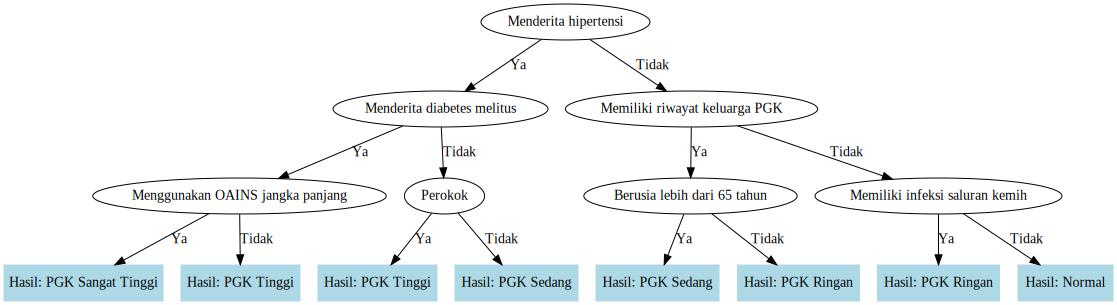

In [ ]:
def draw_tree(node, graph=None, node_id=0):
    if graph is None:
        graph = Digraph()
    curr_id = str(node_id)
    if node.is_leaf():
        graph.node(curr_id, f"Hasil: {node.result}", shape='box', style='filled', color='lightblue')
    else:
        graph.node(curr_id, node.feature)
        left_id = str(node_id * 2 + 1)
        right_id = str(node_id * 2 + 2)
        graph.edge(curr_id, left_id, label='Ya')
        graph.edge(curr_id, right_id, label='Tidak')
        draw_tree(node.left, graph, node_id * 2 + 1)
        draw_tree(node.right, graph, node_id * 2 + 2)
    return graph

draw_tree(manual_tree)

In [ ]:
questions = {
    'hipertensi': 'Apakah Anda menderita hipertensi?',
    'diabetes_melitus': 'Apakah Anda memiliki diabetes melitus?',
    'penggunaan_oains': 'Apakah Anda menggunakan obat anti-inflamasi non-steroid (OAINS) jangka panjang?',
    'merokok': 'Apakah Anda merokok?',
    'riwayat_keluarga_pgk': 'Apakah Anda memiliki riwayat keluarga PGK?',
    'usia_lebih_60': 'Apakah usia Anda di atas 60 tahun?',
    'infeksi_saluran_kemih': 'Apakah Anda memiliki infeksi saluran kemih berulang?'
}

def tanya_ya_tidak(prompt):
    while True:
        jawab = input(f"{prompt} (ya/tidak): ").strip().lower()
        if jawab == 'ya':
            return 0
        elif jawab == 'tidak':
            return 1
        else:
            print("Masukkan hanya 'ya' atau 'tidak'.")

In [ ]:
def simpan_riwayat(data, hasil):
    filename = "riwayat_prediksi_pgk.xlsx"
    row = data.copy()
    row["hasil_prediksi"] = hasil
    row["waktu"] = datetime.now().strftime("%Y-%m-%d %H:%M:%S")

    df_new = pd.DataFrame([row])
    if os.path.exists(filename):
        df_lama = pd.read_excel(filename)
        df = pd.concat([df_lama, df_new], ignore_index=True)
    else:
        df = df_new
    df.to_excel(filename, index=False)

In [ ]:
def jalankan_klasifikasi(node, jawaban_user):
    if node.is_leaf():
        print(f"\n>> Hasil Prediksi: {node.result}")
        simpan_riwayat(jawaban_user, node.result)
        return
    key = node.feature
    pertanyaan = questions.get(key, key)
    jawaban = tanya_ya_tidak(pertanyaan)
    jawaban_user[key] = jawaban
    if jawaban == 1 :
        jalankan_klasifikasi(node.left, jawaban_user)
    else:
        jalankan_klasifikasi(node.right, jawaban_user)

In [ ]:
print("=== Sistem Klasifikasi Penyakit Gagal Ginjal Kronik ===\n")
print("Jawab pertanyaan berikut sesuai dengan kondisi yang sedang kamu alami ya!\n")
data_input = {}
jalankan_klasifikasi(manual_tree, data_input)


=== Sistem Klasifikasi Penyakit Gagal Ginjal Kronik ===

Jawab pertanyaan berikut sesuai dengan kondisi yang sedang kamu alami ya!

Menderita hipertensi (ya/tidak): ya
Memiliki riwayat keluarga PGK (ya/tidak): ya
Memiliki infeksi saluran kemih (ya/tidak): tidak

>> Hasil Prediksi: PGK Ringan
